Sampling alghorithms

Rejection sampling:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

def target_pdf(x):
    return np.exp(-x**2)

def proposal_pdf(x):
    return np.exp(-0.5*x**2) / np.sqrt(2*np.pi)

In [3]:
k = max(target_pdf(x)/proposal_pdf(x) for x in np.linspace(-3, 3, 100))

In [4]:
def rejection_sample(n):
    samples = []
    while len(samples) < n:
        x = np.random.normal()
        if np.random.uniform() < target_pdf(x)/(k*proposal_pdf(x)):
            samples.append(x)
    return np.array(samples)

samples = rejection_sample(1000)

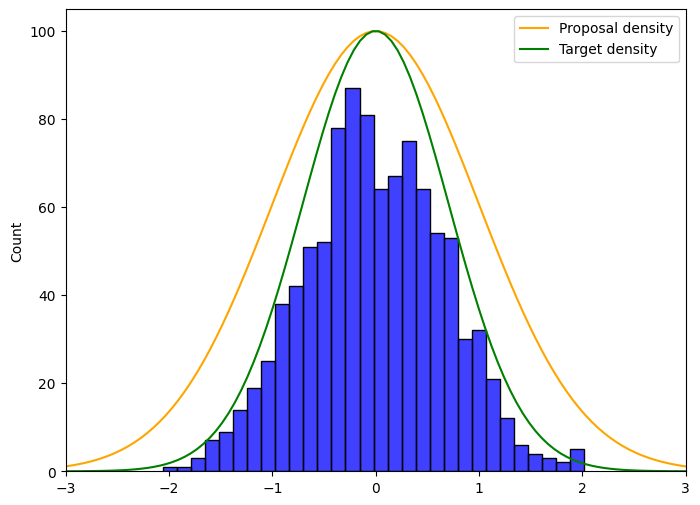

In [5]:
x = np.linspace(-3, 3, 100)
plt.figure(figsize=(8, 6))
sns.histplot(samples, bins=30, kde=False, color='blue')
sns.lineplot(x=x, y=k*100*proposal_pdf(x), label='Proposal density', color='orange')
sns.lineplot(x=x, y=100*target_pdf(x), label='Target density', color='green')
plt.xlim(-3, 3)
plt.legend()
plt.show()

Metropolis–Hastings algorithm

In [6]:
def likelihood(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

def proposal_distribution(x, stepsize=0.5):
    return np.random.normal(x, stepsize)

In [7]:
def mh_step(curr_state, curr_likeli, likelihood, proposal_distribution):
    proposal_state = proposal_distribution(curr_state)
    prop_likeli = likelihood(proposal_state)
    accept_crit = prop_likeli / curr_likeli
    accept_threshold = np.random.uniform(0, 1)
    if accept_crit > accept_threshold:
        return proposal_state, prop_likeli
    else:
        return curr_state, curr_likeli


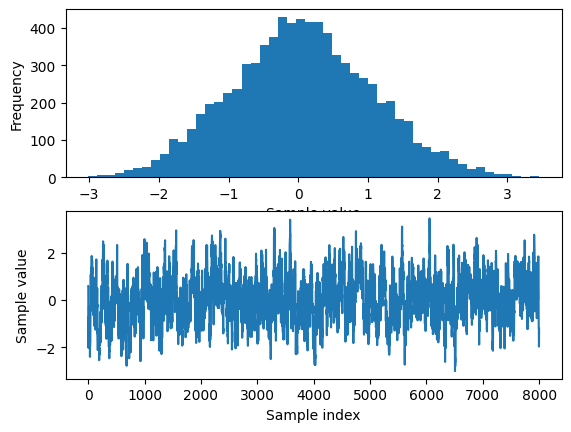

In [8]:

num_samples = 10000
stepsize = 0.5
burnin = 0.2
samples = []
curr_state = 0
curr_likeli = likelihood(curr_state)
for i in range(num_samples):
    curr_state, curr_likeli = mh_step(curr_state, curr_likeli, likelihood, proposal_distribution)
    if i >= burnin * num_samples:
        samples.append(curr_state)

# Visualize the results
fig, axs = plt.subplots(2)
axs[0].hist(samples, bins=50)
axs[0].set_xlabel('Sample value')
axs[0].set_ylabel('Frequency')
axs[1].plot(samples)
axs[1].set_xlabel('Sample index')
axs[1].set_ylabel('Sample value')
plt.show()